In [1]:
# Se pide, usando regresión lineal:
# Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase:

# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
# Representa la matriz de correlación, ¿los datos están correlacionados?
# ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lista_edad_altura = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58]]

In [4]:
X = []
y = []
for i in range(len(lista_edad_altura)):
    X.append(lista_edad_altura[i][0])
    y.append(lista_edad_altura[i][1])
print(X)
print(y)

[29, 22, 31, 27, 22, 35, 34, 26, 26, 23, 24, 28, 23, 32, 34, 27]
[1.66, 1.83, 1.8, 1.75, 1.82, 1.79, 1.9, 1.78, 1.64, 1.74, 1.85, 1.75, 1.83, 1.74, 1.57, 1.58]


In [5]:
X = np.array(X)
y = np.array(y) 
print(X)
y

[29 22 31 27 22 35 34 26 26 23 24 28 23 32 34 27]


array([1.66, 1.83, 1.8 , 1.75, 1.82, 1.79, 1.9 , 1.78, 1.64, 1.74, 1.85,
       1.75, 1.83, 1.74, 1.57, 1.58])

In [6]:
X = X.reshape(-1, 1)
X.shape

(16, 1)

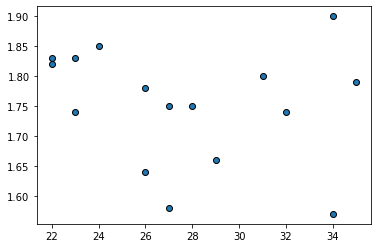

In [7]:
plt.scatter(X,y, edgecolor='black')

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []

def plot_learning_curves(model, X, Y):
    # 80% de Train
    # 20% de Test
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.05)
    
    for m in range(1, len(X_train)):  # Incremental
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
        if m < 4:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

##### ITERACIÓN 1 #####
x [[34]]
y [1.9]
y_train_predict [1.9]
-----
X_val
 [[27]]
y_val_predict [1.9]
##### ITERACIÓN 2 #####
x [[34]
 [22]]
y [1.9  1.82]
y_train_predict [1.9  1.82]
-----
X_val
 [[27]]
y_val_predict [1.85333333]
##### ITERACIÓN 3 #####
x [[34]
 [22]
 [28]]
y [1.9  1.82 1.75]
y_train_predict [1.86333333 1.78333333 1.82333333]
-----
X_val
 [[27]]
y_val_predict [1.81666667]


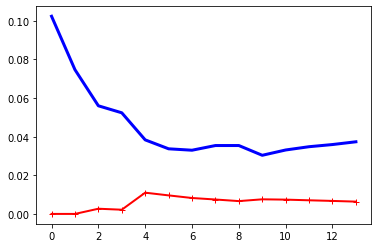

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [10]:
b = lin_reg.coef_ 
b

array([-0.00403974])

In [11]:
a = lin_reg.intercept_
a

1.882384105960265

In [12]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 4.930380657631324e-32, 0.0026888888888888934, 0.002178666666666666, 0.011001617647058815, 0.009594843686561097, 0.00824688149688149, 0.007466135458167327, 0.006636565404355662, 0.007563479224376729, 0.007400573572537517, 0.007055189701897017, 0.006731927683095349, 0.00636717123935667]
val_errors

 [0.1023999999999999, 0.07471111111111105, 0.05601111111111096, 0.05237995111111116, 0.038355494431228356, 0.03372882124381159, 0.03299774216484197, 0.03542193933429629, 0.035424785185808605, 0.030370544609080632, 0.033117783972865605, 0.034817132725229766, 0.03593862386604039, 0.037369242577079895]


In [13]:
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1)
    return model.predict(to_predict)

In [14]:
predict(lin_reg, number=36)

array([1.73695364])

In [15]:
lin_reg.predict(X)

array([1.76523179, 1.79350993, 1.75715232, 1.77331126, 1.79350993,
       1.74099338, 1.74503311, 1.77735099, 1.77735099, 1.7894702 ,
       1.78543046, 1.76927152, 1.7894702 , 1.75311258, 1.74503311,
       1.77331126])

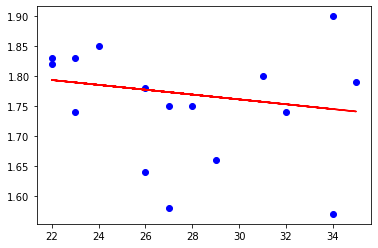

In [16]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

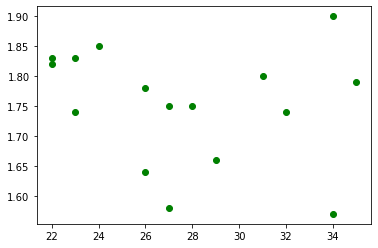

In [17]:
new_model = LinearRegression()
new_model.fit(X, y)

plt.scatter(X, y, color='g')

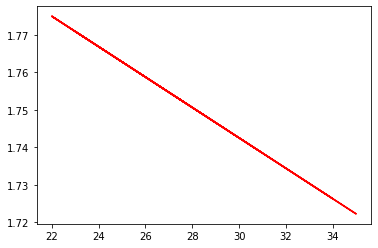

In [18]:
plt.plot(X, new_model.predict(X), color='red')